# Supervised Learning - Class 6

## Logistic Regression: A simple classification model

### Agenda
1. Introduction to Classification
2. Simple Logistic Regression
    - Understand the logistic equation 
    - Fit a simple logistic regression 
    - Interpret the logisti model coefficients
    - Evaluate the logistic model
3. Example of use-case: Multiple Logistic Regression
    - fit 

## 0. Import Packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

import numpy as np
import pandas as pd
from sklearn.linear_model import  LogisticRegression
import statsmodels.api as sm

np.random.seed(0)

## 1. Example of supervised learning with classification

### Example 1: Disease Diagnosis Clasification with specific biomarkers

Generating synthetic data for illustration

In [3]:
# Features: Systolic Blood Pressure and Total Cholesterol Level
X = np.random.randn(100, 2) * [20, 50] + [120, 200]
# Labels: 0 for no disease, 1 for disease
y = (X[:, 0] + X[:, 1] > 300).astype(int)

Plotting the data points pairs (Systolic Blood Pressure -Total Cholesterol Level)

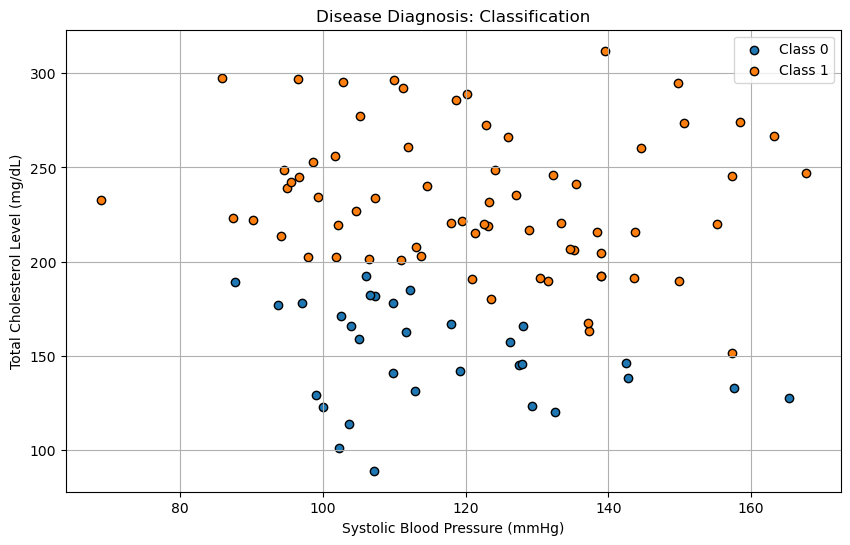

In [4]:
# Plotting the data points
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}', edgecolor='k')

plt.title('Disease Diagnosis: Classification')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Total Cholesterol Level (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()

Adding a decision Boundary

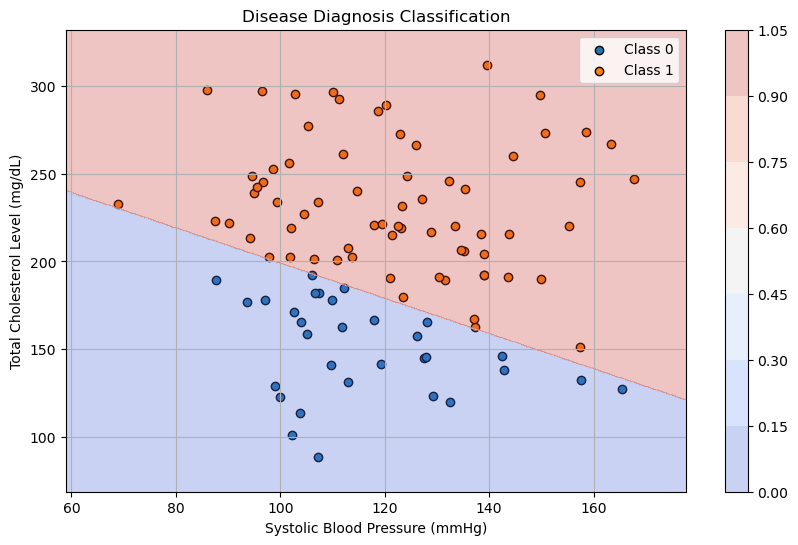

In [5]:
# Plotting the data points with the decision boundary
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}', edgecolor='k')

# Logistic regression model for learning the decision boundary
model = LogisticRegression()
model.fit(X, y)

# Decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-10, X[:, 0].max()+10, 500),
                     np.linspace(X[:, 1].min()-20, X[:, 1].max()+20, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.colorbar()

plt.title('Disease Diagnosis Classification')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Total Cholesterol Level (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()

## 2. Simple Logistic Regression

ADD SOME EXPLANATION REGARDING LOGISTIC REGRESSION

Simple sythetic dataset generated

In [6]:
# Number of data points
n = 200

# Generate synthetic pro-BNP levels
pro_bnp_levels = np.random.randn(n) * 50 + 150  # pro-BNP levels in pg/mL

# Generate binary target variable (1: Heart Failure, 0: No Heart Failure)
threshold = 150  # Threshold for heart failure
heart_failure = (pro_bnp_levels > threshold).astype(int)

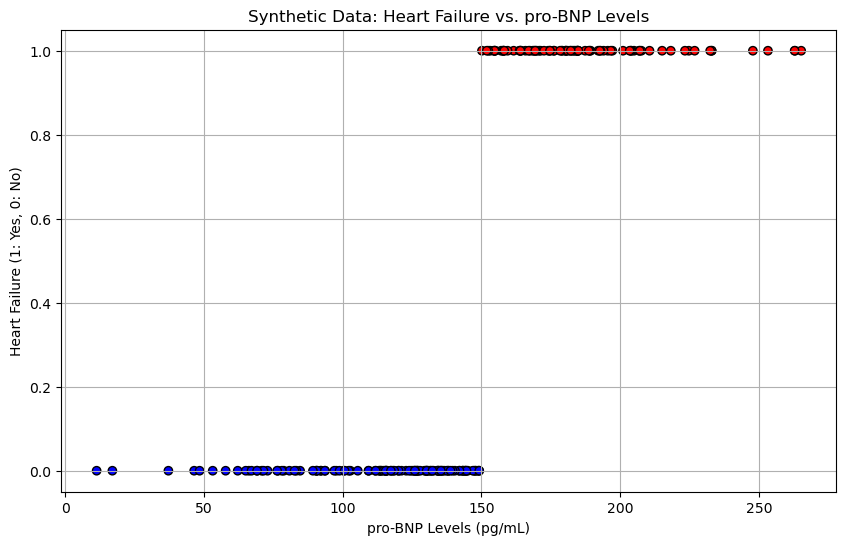

In [7]:
# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(pro_bnp_levels, heart_failure, c=heart_failure, cmap='bwr', edgecolor='k')
plt.xlabel('pro-BNP Levels (pg/mL)')
plt.ylabel('Heart Failure (1: Yes, 0: No)')
plt.title('Synthetic Data: Heart Failure vs. pro-BNP Levels')

plt.grid(True)
plt.show()

In [8]:
# Reshape the data for sklearn (necessary for fitting the model)
X = pro_bnp_levels.reshape(-1, 1)  # Reshape to 2D array with one feature
y = heart_failure

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [9]:
# Generate a range of pro-BNP levels for plotting the sigmoid function
xx = np.linspace(pro_bnp_levels.min()-10, pro_bnp_levels.max()+10, 500).reshape(-1, 1)
yy = model.predict_proba(xx)[:, 1]  # Probability of heart failure

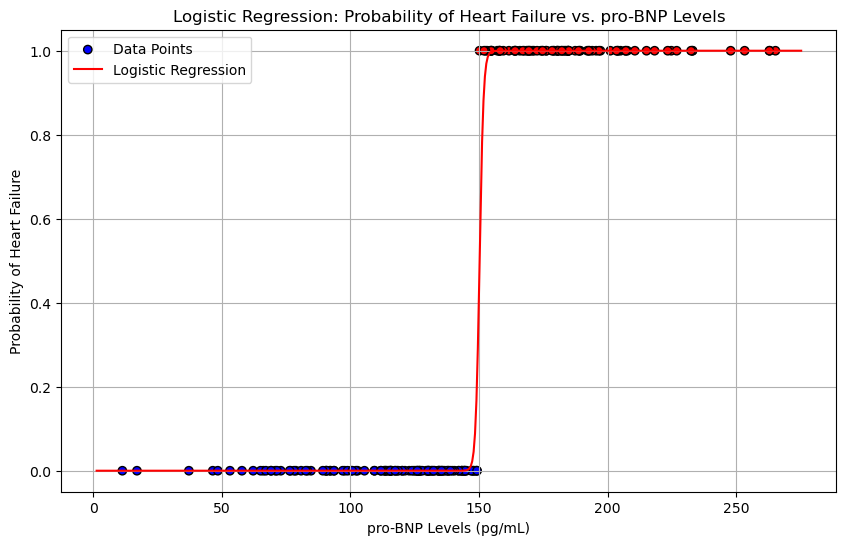

In [10]:
# Plot the sigmoid function and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(pro_bnp_levels, heart_failure, c=heart_failure, cmap='bwr', edgecolor='k', label='Data Points')
plt.plot(xx, yy, color='red', label='Logistic Regression')
plt.xlabel('pro-BNP Levels (pg/mL)')
plt.ylabel('Probability of Heart Failure')
plt.title('Logistic Regression: Probability of Heart Failure vs. pro-BNP Levels')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Print coefficients
print(f"Coefficient (slope): {model.coef_[0][0]}")
print(f"Intercept (log odds at pro-BNP level = 0): {model.intercept_[0]}")

Coefficient (slope): 1.3180629486058535
Intercept (log odds at pro-BNP level = 0): -197.97818895516764


ADD SOME XPLANATION REGARDING THE CONCLUSIONS

## 3. Example use-case: multiple logistic regression 